In [ ]:
#Forecast model for sales

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import stats
import math
%matplotlib inline
import seaborn as sns
import numpy

In [ ]:
#Importing a dataset from local drive
from google.colab import files

In [ ]:
upload=files.upload()

Saving trial.csv to trial.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(upload['trial.csv']))

In [ ]:
df

,Year,No
0,201601,50.0
1,201602,10.0
2,201603,21.0
3,201604,81.0
4,201605,NaN
...,...,...
85,202302,1471.0
86,202303,704.0
87,202304,1134.0
88,202305,1381.0


In [ ]:
#The dataset has 90 rows & 1 columns.
#Here the target column is no of antenaas dispatched to customer month wise and we will be creating a model to predict the number of dispatches which will be made in near future

In [ ]:
#Checking for null values
df.isnull().count()

Year    90
No      90
dtype: int64

In [ ]:
df.isnull().sum()

Year    0
No      2
dtype: int64

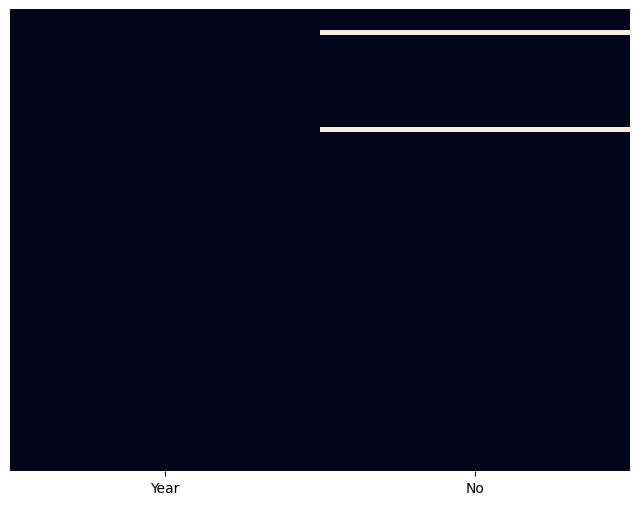

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.show()

In [ ]:
df['No'].fillna(df['No'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Year    0
No      0
dtype: int64

In [ ]:
df.head()

,Year,No
0,201601,50.0
1,201602,10.0
2,201603,21.0
3,201604,81.0
4,201605,0.0


In [ ]:
#Lets rename the no coulumn
df.rename(columns={'No':'Ant'},inplace=True)

In [ ]:
df.head()

,Year,Ant
0,201601,50.0
1,201602,10.0
2,201603,21.0
3,201604,81.0
4,201605,0.0


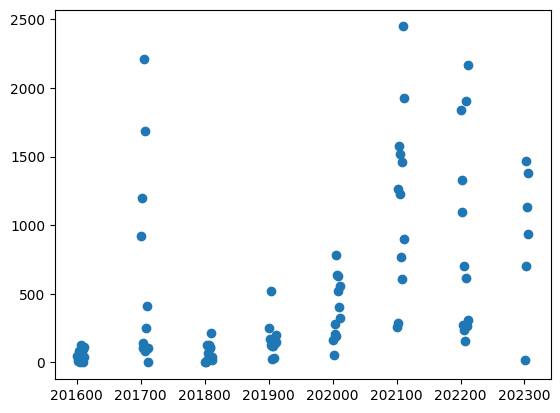

In [ ]:
#seeing in scatterplot
#plt.scatter(df1['Year'],df1['Antennas dispatched"],color='blue',label='Price',s=50))
plt.scatter(df.Year,df.Ant)

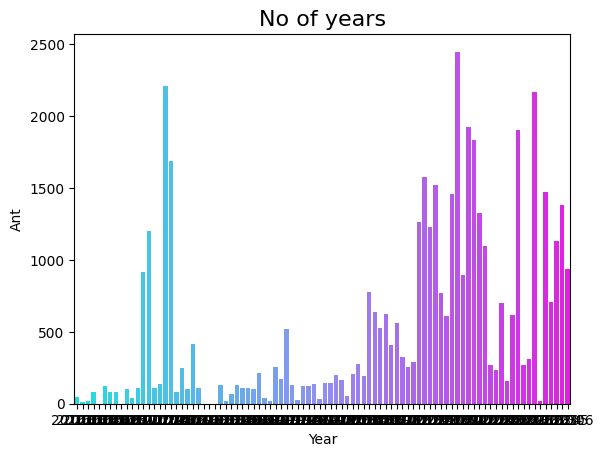

In [ ]:
sns.barplot(x='Year',y='Ant',data=df,palette='cool')
plt.xticks(rotation =0)
##plt.figure(figsize=(20,16))
plt.title("No of years",fontsize=16)
plt.show()

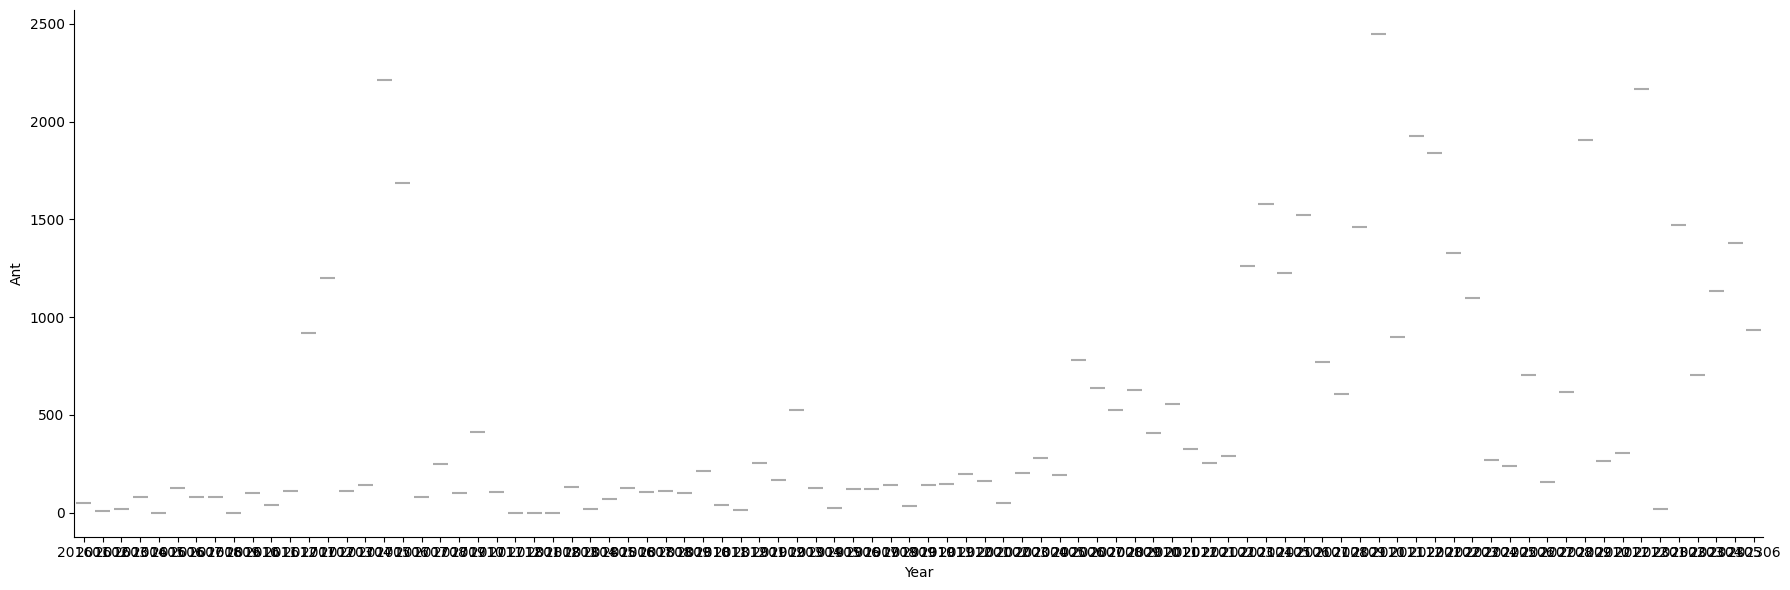

In [ ]:
sns.catplot(y="Ant",x="Year",data=df.sort_values("Year",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [ ]:
Year=df['Year']
Year=pd.get_dummies(Year,drop_first=True)

In [ ]:
Year

,201602,201603,201604,201605,201606,201607,201608,201609,201610,201611,...,202209,202210,202211,202212,202301,202302,202303,202304,202305,202306
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.describe()

,Year,Ant
count,90.000000,90.000000
mean,201932.966667,515.388889
std,218.360307,616.187293
min,201601.000000,0.000000
25%,201711.250000,100.750000
50%,201909.500000,208.500000
75%,202107.750000,752.750000
max,202306.000000,2448.000000


In [ ]:
df.value_counts()

Year    Ant   
201601  50.0      1
202108  607.0     1
202106  1521.0    1
202105  1227.0    1
202104  1580.0    1
                 ..
201805  69.0      1
201804  19.0      1
201803  130.0     1
201802  0.0       1
202306  936.0     1
Length: 90, dtype: int64

In [ ]:
df.shape

(90, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler =MinMaxScaler(feature_range=(0,1))

In [ ]:
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df

array([[9.96515180e-01],
       [2.47150356e-04],
       [9.96520123e-01],
       [4.94300713e-05],
       [9.96525066e-01],
       [1.03803150e-04],
       [9.96530009e-01],
       [4.00383577e-04],
       [9.96534952e-01],
       [0.00000000e+00],
       [9.96539895e-01],
       [6.17875891e-04],
       [9.96544838e-01],
       [3.90497563e-04],
       [9.96549781e-01],
       [4.05326584e-04],
       [9.96554724e-01],
       [0.00000000e+00],
       [9.96559667e-01],
       [4.94300713e-04],
       [9.96564610e-01],
       [1.87834271e-04],
       [9.96569553e-01],
       [5.48673791e-04],
       [9.97009481e-01],
       [4.54262355e-03],
       [9.97014424e-01],
       [5.93160855e-03],
       [9.97019367e-01],
       [5.38787777e-04],
       [9.97024310e-01],
       [6.92020998e-04],
       [9.97029253e-01],
       [1.09240458e-02],
       [9.97034196e-01],
       [8.33885302e-03],
       [9.97039139e-01],
       [4.05326584e-04],
       [9.97044082e-01],
       [1.23575178e-03],


In [ ]:
#Preprocessing the data
training_size = int(len(df)*0.65)
test_size=len(df)-training_size

In [ ]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [ ]:
train_data.shape

(117, 1)

In [ ]:
test_data.shape

(63, 1)

In [ ]:
#Data pre processing
#convert of arrays of data into matrix
def create_dataset(dataset,time_step=1):
  datax,datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[1+time_step,0])
  return numpy.array(datax),numpy.array(datay)

In [ ]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [ ]:
print(x_train.shape),print(y_train.shape)

(16, 100)
(16,)


(None, None)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)


In [ ]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train.shape

(16, 100, 1)

In [ ]:
y_train.shape

(16,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.0011
Epoch 2/100
1/1 [==============================] - 0s 168ms/step - loss: 0.0035
Epoch 3/100
1/1 [==============================] - 0s 258ms/step - loss: 7.9008e-04
Epoch 4/100
1/1 [==============================] - 0s 217ms/step - loss: 7.4765e-05
Epoch 5/100
1/1 [==============================] - 0s 260ms/step - loss: 9.1416e-04
Epoch 6/100
1/1 [==============================] - 0s 239ms/step - loss: 0.0011
Epoch 7/100
1/1 [==============================] - 0s 223ms/step - loss: 5.2829e-04
Epoch 8/100
1/1 [==============================] - 0s 217ms/step - loss: 7.5823e-05
Epoch 9/100
1/1 [==============================] - 0s 220ms/step - loss: 2.7344e-05
Epoch 10/100
1/1 [==============================] - 0s 243ms/step - loss: 2.4263e-04
Epoch 11/100
1/1 [==============================] - 0s 288ms/step - loss: 4.2958e-04
Epoch 12/100
1/1 [==============================] - 0s 300ms/step - loss: 4.2923e-04
Epoc

In [ ]:
#Lets do prediction & check performance metrics
train_predict=model.predict(x_train)
test_predict=(model.predict(x_test))

1/1 [==============================] - 0s 67ms/step


ValueError: ignored

In [ ]:
#Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#plotting
#Shifting train prediction for plotting
look_back=100
train_predictplot=numpy.empty_like(df)
train_predictplot[:,:]=np.nan
train_predictplot[look_back:len(train_predict)+look_back,:]=train_predict

In [ ]:
#Plot baseline & prediction
plt.plot(scaler.inverse_transform(df))
plt.plot(train_predictplot)
plt.show()

In [ ]:
df